# Billionaires in the world

**Author**: Michael Sjoeberg

**Contact**: mail@michaelsjoeberg.com

In this report, we will examine a set of data which represents the number of billionaires in the world, as published by [Forbes](https://www.forbes.com/billionaires), and collated as a [CORGIS](https://think.cs.vt.edu/corgis/csv/billionaires/billionaires.html) set.

In [2]:
# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## <a name="contents"></a> Contents
* [Importing and cleaning the data](#import)
* [Visualising billionaires by country](#country)
* [Total billionaires' wealth by category](#category)

## <a name="import"></a> Importing and cleaning the data
([Contents](#contents))



#### 1. Import the dataset

First, read the csv file <code>billionaires.csv</code> in the directory <code>data</code> into a dataframe named <code>billionaires_df</code>.

In [3]:
# create new dataframe for billionaire dataset
billionaires_df = pd.read_csv('data/billionaires.csv')

# check
billionaires_df.head()

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
0,-1,Financial,Saudi Arabia,Rolaco Trading and Contracting Company,new,SAU,1968,True,1.580000e+11,male,...,Abdul Aziz Al-Sulaiman,404,Middle East/North Africa,founder,construction,True,False,self-made finance,1.0,1996
1,34,Financial,United States,Fidelity Investments,new,USA,1946,True,8.100000e+12,female,...,Abigail Johnson,145,North America,relation,investment banking,True,False,inherited,2.5,1996
2,59,Non-Traded Sectors,Brazil,Companhia Brasileira de Distribui?ao,new,BRA,1948,True,8.540000e+11,male,...,Abilio dos Santos Diniz,322,Latin America,relation,retail,True,False,inherited,1.2,1996
3,61,New Sectors,Germany,Ratiopharm,new,DEU,1881,True,2.500000e+12,male,...,Adolf Merckle,388,Europe,relation,pharmaceuticals,True,False,inherited,1.0,1996
4,-1,Financial,Hong Kong,Swire,new,HKG,1816,True,1.600000e+11,male,...,Adrian and John Swire,162,East Asia,relation,trading company,True,False,inherited,2.2,1996


To check that we have loaded all data, we can use the following cell to ensure that our dataframe contains the correct number of rows.

In [4]:
if (len(billionaires_df) != 2614):
    print('Some rows missing check your answer')
else:
    print('All data loaded!')

All data loaded!


#### 2. Identify and handle missing data

In the dataset, there is a column (<code>company.type</code>) with several missing values.

In [5]:
# note: assuming missing values are values denoted as 'NaN' only
len(billionaires_df[billionaires_df['company.type'].isnull()])

36

Update dataframe <code>billionaires_df</code> so the missing values in the <code>company.type</code> column are replaced with the string "unknown".

In [6]:
# replace each instance of 'NaN' with 'unknown' in company.type
billionaires_df['company.type'] = billionaires_df['company.type'].replace(np.nan, "unknown")

# check
#len(billionaires_df[billionaires_df['company.type'].isnull()])

# check company.type equal to 'unknown'
billionaires_df[billionaires_df['company.type'] == "unknown"].head()

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year
31,-1,Traded Sectors,Mexico,NaN,unknown,MEX,0,True,3.970000e+11,NaN,...,Autrey family,400,Latin America,NaN,NaN,True,False,NaN,1.0,1996
44,-1,Financial,Thailand,NaN,unknown,THA,0,True,1.820000e+11,male,...,Boonsong Asavabhokhin,408,East Asia,NaN,NaN,True,False,NaN,1.0,1996
64,-1,Non-Traded Sectors,Germany,Sirosa,unknown,DEU,0,True,2.500000e+12,NaN,...,Conle famle,328,Europe,NaN,real estate,True,False,NaN,1.2,1996
93,53,Financial,Japan,NaN,unknown,JPN,0,True,4.710000e+12,male,...,Eitaro Itoyama,155,East Asia,NaN,golf courses,True,False,self-made finance,2.3,1996
115,-1,Non-Traded Sectors,Germany,NaN,unknown,DEU,0,True,2.500000e+12,NaN,...,Funke family,174,Europe,NaN,NaN,True,False,NaN,2.1,1996


#### 3. Identify and handle inconsistent or dirty data

There are some typos in the company.type column: "new" has sometimes been entered with unwanted whitespace (" new", "new "), and has sometimes been incorrectly entered as "neew".

In [7]:
# this basically replace each whitespace and typo found with correct value
#billionaires_df['company.type'] = billionaires_df['company.type'].replace(" new", "new")
#billionaires_df['company.type'] = billionaires_df['company.type'].replace("new ", "new")
#billionaires_df['company.type'] = billionaires_df['company.type'].replace("neew", "new")

# or, strip whitespace from all and replace typo found with correct value
billionaires_df['company.type'] = billionaires_df['company.type'].str.strip()
billionaires_df['company.type'] = billionaires_df['company.type'].replace("neew", "new")

# check
billionaires_df[billionaires_df['company.type'] == "neew"]

,age,category,citizenship,company.name,company.type,country code,founded,from emerging,gdp,gender,...,name,rank,region,relationship,sector,was founder,was political,wealth.type,worth in billions,year


#### 4. Identify and handle ambiguity and vagueness

Next, suppose that we would like to know which of the billionaires make their money in the financial services sector.

In [8]:
# note: assuming ouput format is somwehat irrelevant
billionaires_df['industry'].unique()

array(['Money Management', 'Retail, Restaurant', 'Technology-Medical',
       'Consumer', 'Real Estate', 'Mining and metals', 'Media', 'Other',
       'Constrution', 'Energy', 'Non-consumer industrial',
       'Diversified financial', 'Technology-Computer', '0', 'Hedge funds',
       'banking', 'services', 'Private equity/leveraged buyout',
       'Venture Capital', nan], dtype=object)

Now to find out which of these values represent businesses in the financial services sector, which do not, and any which we think it is unclear whether or not they represent financial services.

<b>Businesses in the financial services sector:</b>
- Money Management
- Diversified financial
- Hedge funds
- banking
- Private equity/leveraged buyout
- Venture capital

These are all somewhat obvious, all related to finance, market, or money in some way.

<b>Businesses <u>not</u> in the financial services sector:</b>
- Retail, Restaurant
- Technology-Medical
- Consumer
- Mining and metals
- Media
- Construction
- Energy
- Non-consumer industrial
- Technology-Computer

These are not really related to the financial service sector, with the exception 'Consumer', which also could involve e.g. consumer banking, but assuming it is not since 'banking' is already its own sector.

<b>Businesses that is unclear whether or not in the financial services sector:</b>
- Real Estate
- Other
- 0
- services
- nan

These are all unclear, especially 'Other', '0', and 'services', which could be any sector, and 'Real Estate' depending on the nature of the business, such as investment, or as providing real estate related services. Also, assuming 'nan' is missing value.

## <a name="country"></a> Visualising billionaires by country
([Contents](#contents))



#### 5. Put the data into an appropriate form for plotting

We will use the <code>billionaires_df</code> dataframe to create a new dataframe containing just the data needed for the plot.

In [9]:
# create new dataframe with year and citizenship columns
df = billionaires_df[['year', 'citizenship']]

# select data for 2014 only
df = df[df['year'] == 2014]

# check
#df.head()

# counting number of rows per citizenship
df_grouped = df.groupby('citizenship').count()

# renaming column for clarity
df_grouped = df_grouped.rename(columns={'year':'billionaires'})

# check
df_grouped.head()

,billionaires
citizenship,
Algeria,1
Angola,1
Argentina,5
Australia,29
Austria,10


#### 6. Visualise the data

We will now use our dataframe to generate a bar chart: the name of each country on the x-axis, and the number of billionaires with citizenship from that country on the y-axis.

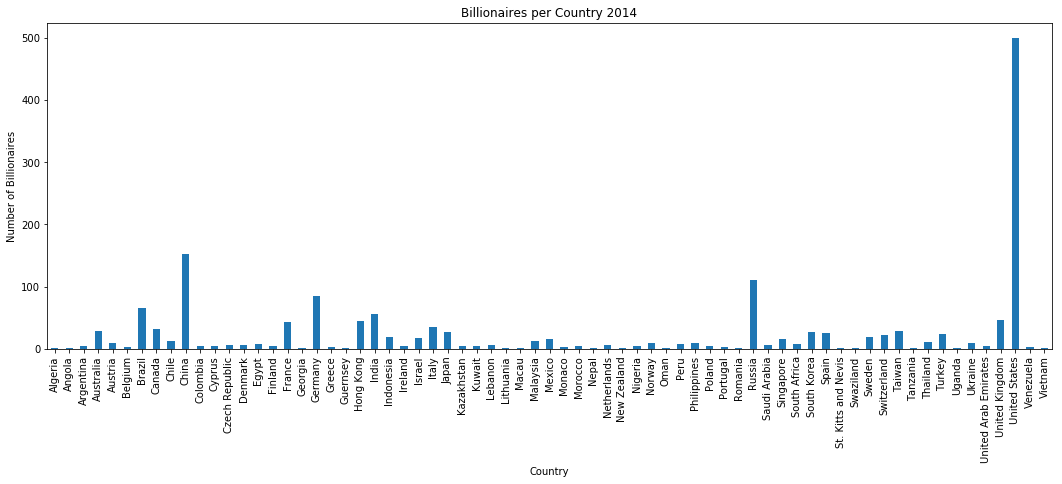

In [10]:
# plot bar chart with defined title and figure size
df_grouped['billionaires'].plot.bar(title="Billionaires per Country 2014", figsize=(18,6))

# set x and y-labels
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')

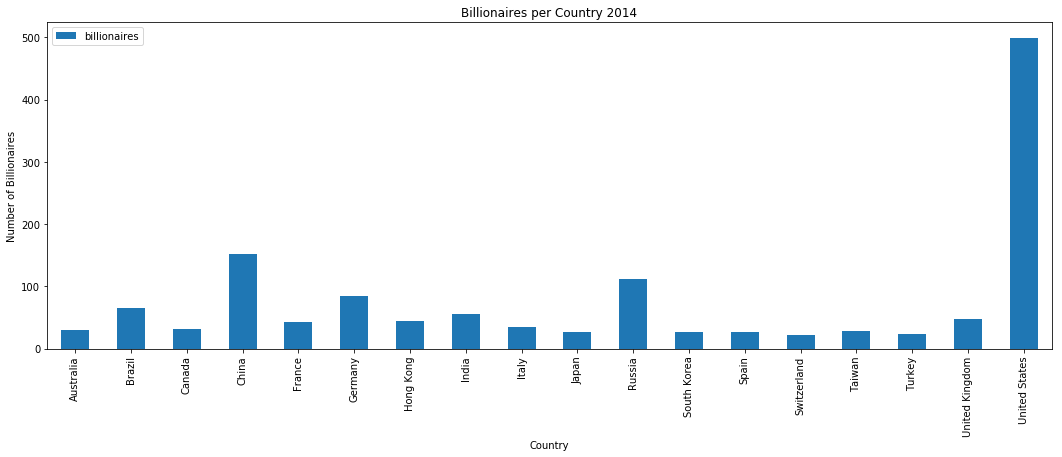

In [11]:
# plot bar chart using filter, greater than 20, with title and figure size
df_grouped[df_grouped['billionaires'] > 20].plot.bar(title="Billionaires per Country 2014", figsize=(18,6))

# set x and y-labels
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')

## <a name="category"></a> Total billionaires' wealth by category
([Contents](#contents))

To investigate the categories from which the wealth was made, we need plot the data in the graph to show the total wealth, the year, and the category. The plot should show:
    
- The x-axis should show years in the range covered by the dataset
- The y-axis should show the total wealth of the billionaires working in that category. The total wealth should be the sum of the values in the "worth in billions" column, and the categories are the values in the "category" column.
- There should be several line graphs plotted, one for each different category, showing the total wealth of all the billionaires working in that sector in the given year. We should show all the lines on one plot, rather than creating a multiplot.
- We should not include categories which do not appear in each of the years 1996, 2001 and 2014.
- The graph should have an appropriate title and legend.

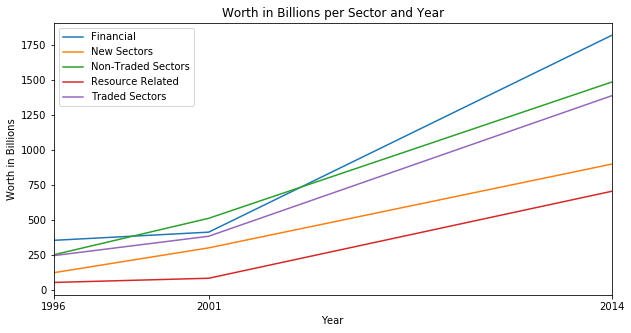

In [12]:
# create new dataframe with year, category, and worth in billions columns
df_categories = billionaires_df[['year', 'category', 'worth in billions']]

# select categories that appear in each year (hence excluding 0, Finance, Trucking, and energy)
df_categories = df_categories[(df_categories['category'] != '0') &
                              (df_categories['category'] != 'Finance') & 
                              (df_categories['category'] != 'Trucking') &
                              (df_categories['category'] != 'energy')]

# sum the rows in worth in billions per category and year
df_categories_grouped = df_categories.groupby(['year', 'category']).agg('sum')

# check
#print(df_categories_grouped)

# unstack grouped dataframe and plot a line chart with title, figure size, and specific x-axis ticks as years
df_categories_grouped['worth in billions'].unstack().plot.line(title="Worth in Billions per Sector and Year", 
                                                               figsize=(10,5), 
                                                               xticks=(1996, 2001, 2014))

# set x and y-labels, and position legend for categories
plt.xlabel('Year')
plt.ylabel('Worth in Billions')
plt.legend(loc='upper left')

#### 7. Interpret plot

Other than the steady increase in wealth overall for all sectors, the composition (i.e. Financial, Non-Traded Sectors, Traded Sectors, New Sectors, and Resource Related) seem to be the same over the years, with the exception of year 2001 (perhaps due to the "dot-com bubble"?). Financial is the biggest growth market and the highest wealth sector, and the 0 categories is probably all others, and is a tiny part of the overall wealth.